In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data = pd.read_csv("~/Desktop/thesis/data/thesis_full_clean_long.csv")

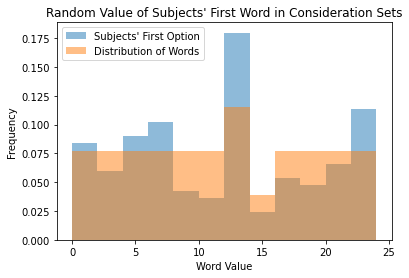

In [5]:
# Want to check that subjects generate words randomly

to_plot_empirical = data.loc[data["order"]==1, "value"]
to_plot_theoretical = data.groupby("word").agg({"value": "mean"})

bins = [i*2 for i in range(13)]

plt.hist(to_plot_empirical,
         label="Subjects' First Option",
         alpha=0.5,
         bins=bins,
         weights=np.ones(len(to_plot_empirical)) / len(to_plot_empirical))
plt.hist(to_plot_theoretical,
         label="Distribution of Words",
         alpha=0.5,
         bins=bins,
         weights=np.ones(len(to_plot_theoretical)) / len(to_plot_theoretical))
plt.title("Random Value of Subjects' First Word in Consideration Sets")
plt.legend()
plt.xlabel("Word Value")
plt.ylabel("Frequency")
plt.show()

In [6]:
(data[data["condition_a"]].groupby("word")
 .agg({"value": "mean"})
 .join(data.loc[data["order"]==1, "word"].value_counts())
 .rename(columns={"word": "count"})
 .sort_values("value")
)

,value,count
word,,
wizard,1,4
anxiety,3,9
javelin,5,14
autumn,7,13
firefly,9,2
baptism,11,5
canvas,13,9
silver,15,4
injury,17,1


In [7]:
(data[~data["condition_a"]].groupby("word")
 .agg({"value": "mean"})
 .join(data.loc[data["order"]==1, "word"].value_counts())
 .rename(columns={"word": "count"})
 .sort_values("value")
)

,value,count
word,,
dragon,1,10
jacket,3,1
energy,5,1
magnet,7,4
chimney,9,5
bakery,11,1
almond,13,7
pumpkin,13,14
liquid,17,8


In [8]:
data = (data.merge(
    (data
     .groupby("subject.id").agg({"order": "max"})
     .reset_index()
     .rename(columns={"order": "num_eval"})
    )
    , on="subject.id")
)

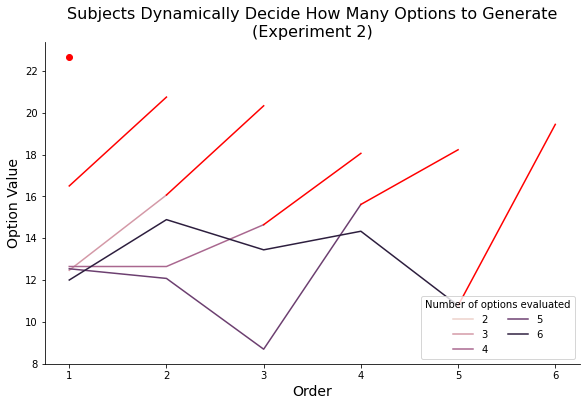

In [22]:
import seaborn as sns

# Each line is the average for all subjects with the same total number
# of options evaluated. The y axis specifies the average s2 values for
# each number of options already evaluated. The lines are each one
# longer than the next because those with 6 options evaluated have
# one more datapoint than those that only evaluated 5 in total.

max_num_eval = 6

to_plot = data.groupby(["order", "num_eval"]).agg({"value": "mean"}).reset_index()
to_plot = to_plot[(to_plot["order"] != np.NaN)&(to_plot["num_eval"] <= max_num_eval)]
sns.relplot(data=to_plot[to_plot["num_eval"]!=to_plot["order"]],
            x="order",
            y="value",
            kind="line",
            hue="num_eval",
            height=5,
            aspect=8/5,
            legend=False,
           )

last_line = to_plot[(to_plot["num_eval"]==to_plot["order"])|(to_plot["num_eval"]==to_plot["order"]+1)]
for num_eval in last_line["num_eval"].unique():
    plt.plot(last_line.loc[last_line["num_eval"]==num_eval, "order"], last_line.loc[last_line["num_eval"]==num_eval, "value"], color="red")

only_one = to_plot[(to_plot["order"]==1)&(to_plot["num_eval"]==1)]
plt.scatter(only_one["num_eval"], only_one["value"], color="red")
plt.title("Subjects Dynamically Decide How Many Options to Generate\n(Experiment 2)", size=16)
plt.legend(title="Number of options evaluated", labels=list(range(2, max_num_eval+1)), loc="lower right", ncol=2)
plt.ylabel("Option Value", size=14)
plt.xlabel("Order", size=14)
plt.show()

# It looks like we do have quite a considerable bump at the end of each line,
# which is strong support for the dynamic theory, that the overall downsloping
# (flat in this case) trend is superseded by the fact that subjects stopped
# being due to having found something good.

# I attribute the almost across the board bump down for the second option evaluated
# to February being frequently evaluated second (see previous charts)

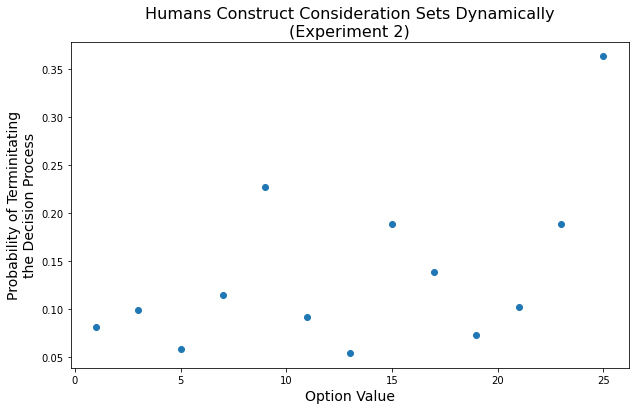

In [19]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(1, 1, 1)

to_plot = data.groupby("value").agg({"last": "mean"}).reset_index()

plt.scatter(to_plot["value"], to_plot["last"])
plt.title("Humans Construct Consideration Sets Dynamically\n(Experiment 2)", size=16)
plt.xlabel("Option Value", size=14)
plt.ylabel("Probability of Terminitating\nthe Decision Process", size=14)
plt.show()